In [3]:
!pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import tensorflow as tf
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.12/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('/content/credit_risk_cleaned.csv',index_col=False)

In [5]:
data=data.iloc[:,1:]

In [6]:
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,22.0,59000.0,3,12.438169,4,3,35000,16.020000,0.590000,1,3.0,1
1,21.0,9600.0,2,5.000000,1,1,1000,11.140000,0.100000,0,2.0,0
2,25.0,9600.0,0,1.000000,3,2,5500,12.870000,0.570000,0,3.0,1
3,23.0,65500.0,3,4.000000,3,2,35000,15.230000,0.530000,0,2.0,1
4,24.0,54400.0,3,8.000000,3,2,35000,14.270000,0.550000,1,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
50941,26.0,45701.0,3,2.514358,3,1,18185,12.748637,0.397428,0,5.0,1
50942,34.0,61595.0,2,12.438169,3,1,30000,12.596352,0.479102,0,8.0,1
50943,21.0,32221.0,3,0.000000,4,1,12000,11.223159,0.375579,0,3.0,1
50944,29.0,8000.0,3,0.409676,1,0,4307,11.056065,0.536871,0,6.0,1


In [7]:
categorical_columns=['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [8]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False)
one_hot_encoded=encoder.fit_transform(data[categorical_columns])

In [9]:
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

In [10]:
df_encoded = pd.concat([data, one_hot_df], axis=1)

df_encoded = df_encoded.drop(categorical_columns, axis=1)
print(f"Encoded Credit Risk Data : \n{df_encoded}")

Encoded Credit Risk Data : 
       person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0            22.0        59000.0          12.438169      35000      16.020000   
1            21.0         9600.0           5.000000       1000      11.140000   
2            25.0         9600.0           1.000000       5500      12.870000   
3            23.0        65500.0           4.000000      35000      15.230000   
4            24.0        54400.0           8.000000      35000      14.270000   
...           ...            ...                ...        ...            ...   
50941        26.0        45701.0           2.514358      18185      12.748637   
50942        34.0        61595.0          12.438169      30000      12.596352   
50943        21.0        32221.0           0.000000      12000      11.223159   
50944        29.0         8000.0           0.409676       4307      11.056065   
50945        31.0        31013.0           0.000000       4982      11.456729   


In [11]:
X=df_encoded.drop('loan_status',axis=1)
y=df_encoded['loan_status']

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=53)

In [13]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train=std.fit_transform(X_train)


In [14]:
X_test=std.transform(X_test)

In [15]:
X_train.shape

(40756, 26)

In [16]:
X_test.shape

(10190, 26)

In [17]:
#Tensorflow lets create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [18]:
#Initialize
classifier=Sequential()

In [19]:
#Add the input layer
classifier.add(Dense(units=26,activation='relu'))

In [20]:
#Add hidden layer
classifier.add(Dense(units=15,activation='relu'))

In [21]:
#Add hidden layer
classifier.add(Dense(units=8,activation='relu'))

In [22]:
classifier.add(Dense(units=1,activation='sigmoid'))

In [23]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
#Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [25]:
model_history=classifier.fit(X_train,y_train,validation_split=0.3,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
2853/2853 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.7654 - loss: 0.4763 - val_accuracy: 0.8302 - val_loss: 0.3676
Epoch 2/1000
2853/2853 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8331 - loss: 0.3635 - val_accuracy: 0.8361 - val_loss: 0.3517
Epoch 3/1000
2853/2853 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8389 - loss: 0.3486 - val_accuracy: 0.8394 - val_loss: 0.3430
Epoch 4/1000
2853/2853 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8438 - loss: 0.3355 - val_accuracy: 0.8443 - val_loss: 0.3364
Epoch 5/1000
2853/2853 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8507 - loss: 0.3284 - val_accuracy: 0.8440 - val_loss: 0.3344
Epoch 6/1000
2853/2853 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8514 - loss: 0.3237 - val_accuracy: 0.8445 - val_loss: 0.3320
Epoch 7/1000
2853/2853 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8492 - loss: 0.3243 - val_accuracy: 0.8470 - val_loss: 0.3312
Epoch 8/1000
2853/2853 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.

In [26]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

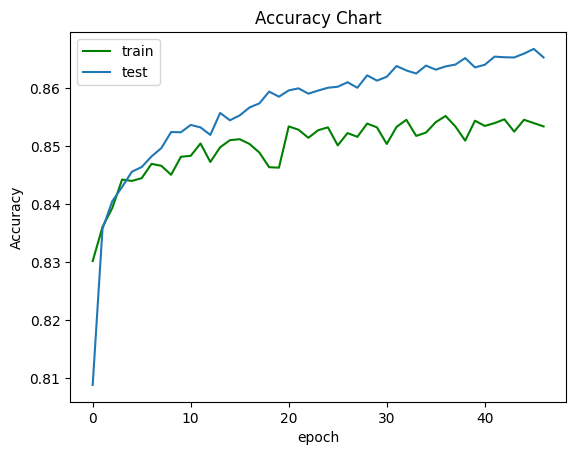

In [32]:
plt.plot(model_history.history['val_accuracy'],color='green')
plt.plot(model_history.history['accuracy'])
plt.title('Accuracy Chart')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

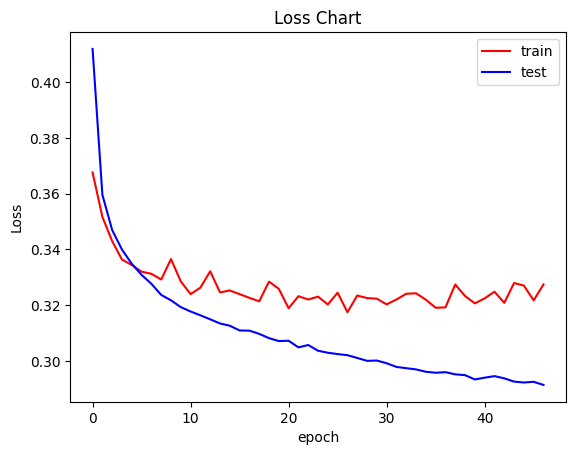

In [31]:
plt.plot(model_history.history['val_loss'],c='red')
plt.plot(model_history.history['loss'],c='blue')
plt.title('Loss Chart')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['train','test'],loc='upper right')
plt.show()

In [34]:
from sklearn.metrics import accuracy_score
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)
print('Accuracy for test data : ',accuracy_score(y_test,y_pred)*100)

319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy for test data :  85.5937193326791


In [35]:
#Make the confusion metrics
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [36]:
cm

array([[4611,  502],
       [ 966, 4111]])

In [37]:
#get the weights
classifier.get_weights()

[array([[-8.04066241e-01,  3.79871011e-01,  2.59370625e-01,
         -4.35048342e-01,  4.05772597e-01, -1.41848087e-01,
         -1.85420766e-01, -2.56323934e-01, -1.72656134e-01,
          3.91901702e-01, -7.28803948e-02, -5.46054095e-02,
         -7.29469210e-02, -1.10424328e+00, -1.76321828e+00,
         -1.87696621e-01, -3.42535585e-01, -3.02588463e-01,
         -2.15164125e-02,  3.17918301e-01,  1.13874054e+00,
         -2.85761297e-01,  9.60831270e-02,  3.39217842e-01,
         -3.18469465e-01,  8.30076754e-01],
        [ 5.29563665e-01,  6.48341596e-01, -3.84127468e-01,
          1.26264080e-01,  2.47135326e-01, -5.85661411e-01,
          6.53185725e-01, -1.21567965e+00, -5.83329916e-01,
         -6.62382126e-01,  7.44263470e-01, -5.92032373e-01,
          5.33517540e-01, -1.49177447e-01,  2.35675603e-01,
         -1.20616354e-01,  8.08959752e-02,  6.06328607e-01,
         -1.77889634e-02,  3.13168854e-01,  3.05917591e-01,
          7.62498796e-01, -8.79696786e-01,  1.10536575e-

In [38]:
import pickle
    # Assume `model` is your trained model
with open('my_dl_model_1.pkl', 'wb') as f:
  pickle.dump(classifier, f)

In [40]:
with open('my_dl_model_1.pkl', 'rb') as f:
  loaded_model = pickle.load(f)